In [18]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import swifter
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('dataset/data.csv')

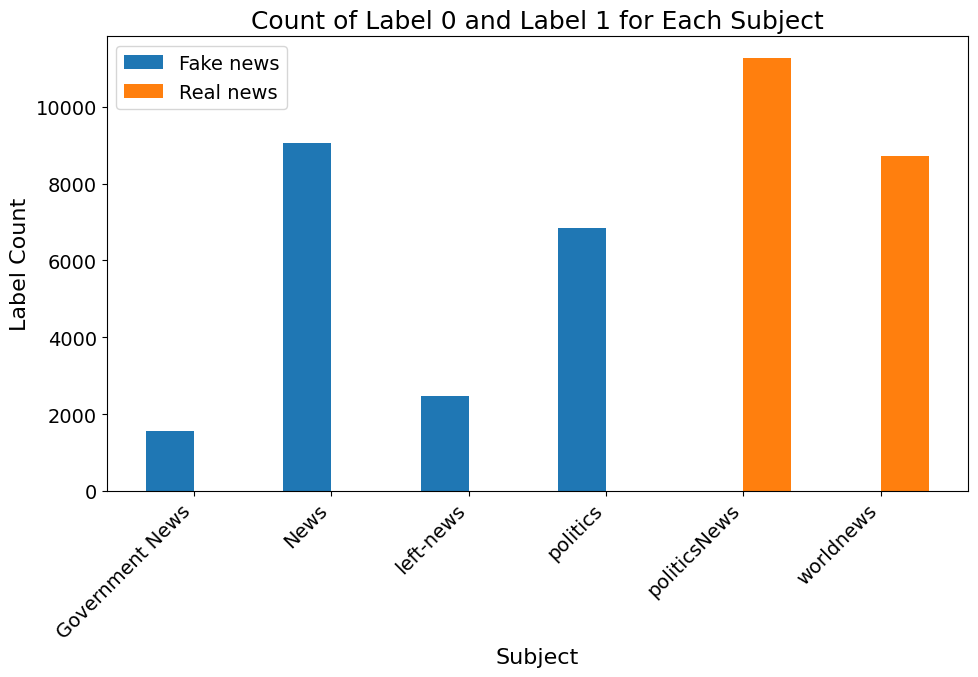

label               0      1
subject                     
Government News  1570      0
News             9050      0
left-news        2482      0
politics         6841      0
politicsNews        0  11272
worldnews           0   8727


In [ ]:
# Count the occurrences of each label for each subject and reshape the DataFrame
label_counts = df.groupby(['subject', 'label']).size().unstack(fill_value=0)

# Set font sizes for the plot
plt.rcParams['font.size'] = 14  # Base font size
plt.rcParams['axes.titlesize'] = 18  # Title font size
plt.rcParams['axes.labelsize'] = 16  # Axis labels size
plt.rcParams['xtick.labelsize'] = 14  # X tick labels size
plt.rcParams['ytick.labelsize'] = 14  # Y tick labels size
plt.rcParams['legend.fontsize'] = 14  # Legend font size

# Get unique subjects and set up x positions
subjects = label_counts.index
x = np.arange(len(subjects))
width = 0.35  # Width of the bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for label 0 and label 1
if 0 in label_counts.columns:
    ax.bar(x - width/2, label_counts[0], width, label='Fake news')
if 1 in label_counts.columns:
    ax.bar(x + width/2, label_counts[1], width, label='Real news')

# Add labels, title, and legend
ax.set_xlabel('Subject')
ax.set_ylabel('Label Count')
ax.set_title('Count of Label 0 and Label 1 for Each Subject')
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the actual counts for reference
print(label_counts)

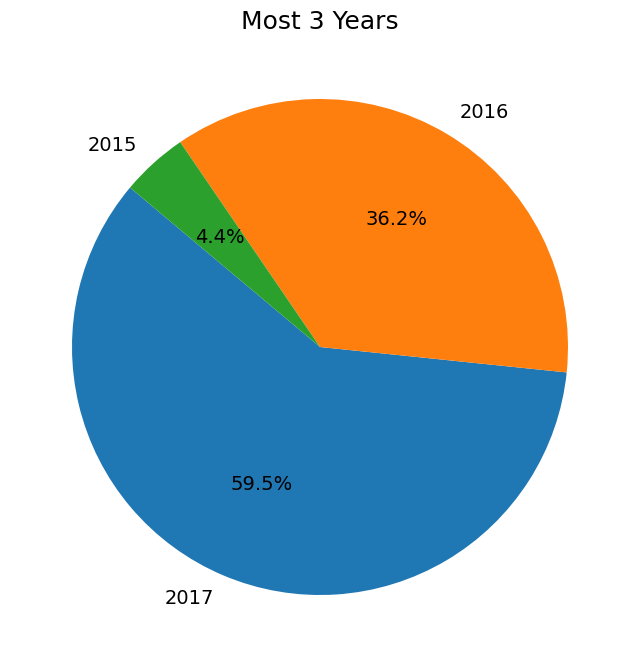

In [21]:
year=df['date'].apply(lambda x: x.split()[-1])
year=year.value_counts().head(3)

plt.figure(figsize=(8, 10))
plt.pie(year, labels=year.index, autopct='%1.1f%%', startangle=140)
plt.title("Most 3 Years")
plt.show()

## Take balanced classes

In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [23]:
# Function for preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    # Remove emails
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', text)

    # Remove links
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Remove anything other than letters and spaces
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # filtered_tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords and lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)
# Apply preprocessing on title and text
df['text'] = df['title'] + " " + df['text']
df['text'] = df['text'].swifter.apply(preprocess_text)


Pandas Apply: 100%|██████████| 39942/39942 [00:55<00:00, 721.01it/s] 


In [24]:
df

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",u budget fight loom republican flip fiscal scr...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,u military accept transgender recruit monday p...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u republican senator let mr mueller job...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,trump want postal service charge much amazon s...,politicsNews,"December 29, 2017"
...,...,...,...,...,...
39937,0,THIS IS NOT A JOKE! Soros-Linked Group Has Pla...,joke soroslinked group plan destroy trumpwill ...,left-news,"Sep 22, 2016"
39938,0,THE SMARTEST WOMAN In Politics: “How Trump Can...,smartest woman politics trump knock hillary fi...,left-news,"Sep 22, 2016"
39939,0,BREAKING! SHOCKING VIDEO FROM CHARLOTTE RIOTS:...,breaking shocking video charlotte riot situati...,left-news,"Sep 21, 2016"
39940,0,BREAKING! Charlotte News Station Reports Cops ...,breaking charlotte news station report cop das...,left-news,"Sep 21, 2016"


In [101]:
X =df['text']
y = df['label']

from sklearn.model_selection import train_test_split

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=62)

In [48]:
from collections import Counter
import itertools

all_words = list(itertools.chain(*df['text'].apply(lambda x: x.split())))
word_counts = Counter(all_words)

print("Total unique words:", len(word_counts))

Total unique words: 187675


In [49]:
rare_words = [word for word, count in word_counts.items() if count < 5]
print(f"Number of rare words (appear <5 times): {len(rare_words)}")

Number of rare words (appear <5 times): 146129


In [50]:
import numpy as np

word_freq_values = np.array(sorted(word_counts.values(), reverse=True))
cumulative_freq = np.cumsum(word_freq_values) / np.sum(word_freq_values)

max_features = np.argmax(cumulative_freq >= 0.95) + 1
print(f"Suggested max_features to cover 95%: {max_features}")

Suggested max_features to cover 95%: 17889


In [102]:
vectorizer = TfidfVectorizer(max_features=9000)
X_train = vectorizer.fit_transform(X_train)  
X_test= vectorizer.transform(X_test)




In [106]:
len(vectorizer.get_feature_names_out())

9000

In [104]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



# Initialize and train model
model = RandomForestClassifier(n_jobs=-1,n_estimators=700)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3969
           1       1.00      1.00      1.00      4020

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



In [105]:
y_trina_pred = model.predict(X_train)
print("Accuracy train :", accuracy_score(y_train, y_trina_pred))
print("Accuracy test :", accuracy_score(y_test, y_pred))


Accuracy train : 1.0
Accuracy test : 0.9977469019902365


# FIt all Data

In [42]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X)  


In [44]:
model.fit(X_train, y)

RandomForestClassifier(n_estimators=600, n_jobs=-1)

In [45]:
import joblib

joblib.dump(model,'NLP_model.pkl')
joblib.dump(vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']